### Logistic Regression Classifier

#### Details tutorial link: https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial

### Import necessary libraries and reading the desired dataset

In [1]:
# Import necessary Python libraries
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# See files in the dataset directory
directory = r"C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species"

# Define the output path
output_path = r"C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Figures"

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\11 Species.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Beech_leaf_disease_nematode_100_records.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Common_Buckthorn_100_records.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Garlic Mustard 100 records.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Garlic Mustard 568 records.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Hemlock Woolly Adelgid_100_records.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Japanese Knotweed 100 records.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Japanese_Barberry_100_records.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Multiflora Rose 100 records.xlsx
C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\Multiflora_Rose_confirmed_50

In [44]:
# Define the filename
#filename = "Garlic Mustard 568 records.xlsx"

# Construct the full file path
#file_path = os.path.join(directory, filename)

df = pd.read_excel(r"C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Dataset_11_species\11 Species.xlsx", engine="openpyxl")  # Use 'openpyxl' for .xlsx files

### Data preprocessing

In [47]:
# Convert 'com_score' to numeric, setting non-numeric values to NaN
df["com_score"] = pd.to_numeric(df["com_score"], errors='coerce')
df["geo_score"] = pd.to_numeric(df["geo_score"], errors='coerce')
df.head()

,S.L.,imaplink,presenceId,presentSpeciesId,iMapPhoto,imap_sci,imap_com,imap_record_taxon,inatlink,inat_sci,inat_com,inat_taxon,geo_score,com_score,visual_model,species_label,com_status,Verification,Photo_quality,Photo_GB
0,1,View,1410322,1422773,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,9.33,93.99,NaN,1,NaN,Both iMap and iNat correct,Good photo,Good Photo
1,2,View,1409419,1421839,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,9.33,94.06,NaN,1,NaN,Both iMap and iNat correct,Good photo,Good Photo
2,3,View,1062878,1067548,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,7.90,74.07,NaN,1,NaN,Both iMap and iNat correct,Good photo,Good Photo
3,4,View,1054189,1058523,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,7.90,89.51,NaN,1,NaN,Both iMap and iNat correct,Good photo,Good Photo
4,5,View,1150463,1157323,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,45.38,99.80,NaN,1,NaN,Both iMap and iNat correct,Good photo,Good Photo


In [10]:
df.shape

(1100, 19)

In [12]:
df.columns

Index(['S.L.', 'imaplink', 'presenceId', 'presentSpeciesId', 'iMapPhoto',
       'imap_sci', 'imap_com', 'imap_record_taxon', 'inatlink', 'inat_sci',
       'inat_com', 'inat_taxon', 'geo_score', 'com_score', 'visual_model',
       'species_label', 'com_status', 'Verification', 'Photo_quality'],
      dtype='object')

In [14]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 9 categorical variables

The categorical variables are : ['imaplink', 'iMapPhoto', 'imap_sci', 'imap_com', 'inatlink', 'inat_sci', 'inat_com', 'Verification', 'Photo_quality']


In [16]:
df[categorical].head()

,imaplink,iMapPhoto,imap_sci,imap_com,inatlink,inat_sci,inat_com,Verification,Photo_quality
0,View,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,View,Litylenchus crenatae,Beech leaf disease,Both iMap and iNat correct,Good photo
1,View,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,View,Litylenchus crenatae,Beech leaf disease,Both iMap and iNat correct,Good photo
2,View,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,View,Litylenchus crenatae,Beech leaf disease,Both iMap and iNat correct,Good photo
3,View,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,View,Litylenchus crenatae,Beech leaf disease,Both iMap and iNat correct,Good photo
4,View,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,View,Litylenchus crenatae,Beech leaf disease,Both iMap and iNat correct,Good photo


In [18]:
df.isnull().sum()

S.L.                    0
imaplink                0
presenceId              0
presentSpeciesId        0
iMapPhoto               0
imap_sci                0
imap_com                0
imap_record_taxon       0
inatlink                0
inat_sci                0
inat_com                0
inat_taxon              0
geo_score               0
com_score               0
visual_model          900
species_label           0
com_status           1100
Verification            0
Photo_quality           0
dtype: int64

In [20]:
df.describe()

,S.L.,presenceId,presentSpeciesId,imap_record_taxon,inat_taxon,geo_score,com_score,visual_model,species_label,com_status
count,1100.0000,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1100.000000,1100.000000,200.000000,1100.000000,0.0
mean,50.5000,1.081358e+06,1.088824e+06,2.578634e+05,2.429518e+05,36.508700,75.750291,0.870000,0.806364,NaN
std,28.8792,3.319271e+05,3.369838e+05,3.644955e+05,3.422494e+05,24.647425,29.786981,0.337147,0.395327,NaN
min,1.0000,3.291820e+05,3.291820e+05,5.481100e+04,8.900000e+02,0.000000,2.290000,0.000000,0.000000,NaN
25%,25.7500,1.021865e+06,1.022410e+06,5.727800e+04,5.727800e+04,16.010000,56.962500,1.000000,1.000000,NaN
50%,50.5000,1.162448e+06,1.169620e+06,6.151300e+04,6.151300e+04,32.470000,92.285000,1.000000,1.000000,NaN
75%,75.2500,1.334849e+06,1.349053e+06,3.247260e+05,3.247260e+05,51.260000,98.960000,1.000000,1.000000,NaN
max,100.0000,1.443675e+06,1.458325e+06,1.103716e+06,1.148360e+06,91.590000,100.000000,1.000000,1.000000,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.L.               1100 non-null   int64  
 1   imaplink           1100 non-null   object 
 2   presenceId         1100 non-null   int64  
 3   presentSpeciesId   1100 non-null   int64  
 4   iMapPhoto          1100 non-null   object 
 5   imap_sci           1100 non-null   object 
 6   imap_com           1100 non-null   object 
 7   imap_record_taxon  1100 non-null   int64  
 8   inatlink           1100 non-null   object 
 9   inat_sci           1100 non-null   object 
 10  inat_com           1100 non-null   object 
 11  inat_taxon         1100 non-null   int64  
 12  geo_score          1100 non-null   float64
 13  com_score          1100 non-null   float64
 14  visual_model       200 non-null    float64
 15  species_label      1100 non-null   int64  
 16  com_status         0 non

Text(0, 0.5, 'Geo Score')

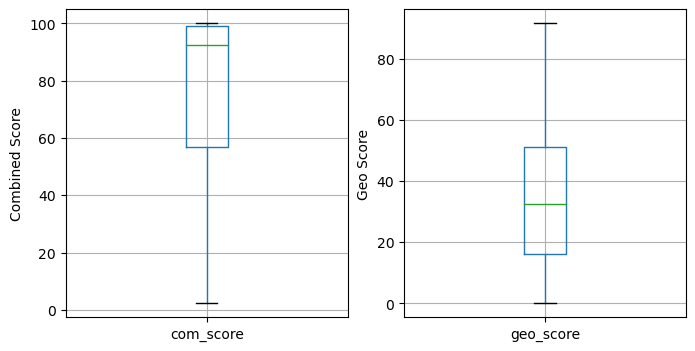

In [24]:
# draw boxplots to visualize outliers
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
fig = df.boxplot(column='com_score')
fig.set_title('')
fig.set_ylabel('Combined Score')

plt.subplot(1, 2, 2)
fig = df.boxplot(column='geo_score')
fig.set_title('')
fig.set_ylabel('Geo Score')

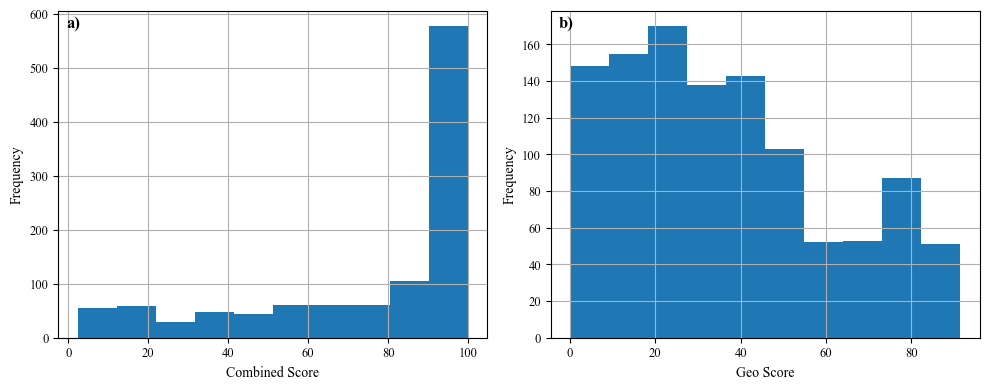

In [26]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Plot histograms with improved formatting
plt.figure(figsize=(10, 4))

# Histogram for Combined Score
plt.subplot(1, 2, 1)
fig = df.com_score.hist(bins=10)  
plt.xlabel('Combined Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.text(0.02, 0.95, 'a)', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

# Histogram for Geo Score
plt.subplot(1, 2, 2)
fig = df.geo_score.hist(bins=10) 
plt.xlabel('Geo Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.text(0.02, 0.95, 'b)', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Save the plot (use the correct output_path)
#output_file = os.path.join(output_path, "Spread of combined and geo score.png")
#plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


In [28]:
df[["com_score", "geo_score"]].describe()

,com_score,geo_score
count,1100.000000,1100.000000
mean,75.750291,36.508700
std,29.786981,24.647425
min,2.290000,0.000000
25%,56.962500,16.010000
50%,92.285000,32.470000
75%,98.960000,51.260000
max,100.000000,91.590000


In [30]:
# Replace Outliers of com_score with Mean
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["com_score"].quantile(0.25)
Q3 = df["com_score"].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Compute the mean of the column
mean_value = df["com_score"].mean()

# Replace outliers with the mean value
df["com_score"] = np.where((df["com_score"] < lower_bound) | (df["com_score"] > upper_bound), mean_value, df["com_score"])

In [32]:
df[["com_score", "geo_score"]].describe()

,com_score,geo_score
count,1100.000000,1100.000000
mean,75.750291,36.508700
std,29.786981,24.647425
min,2.290000,0.000000
25%,56.962500,16.010000
50%,92.285000,32.470000
75%,98.960000,51.260000
max,100.000000,91.590000


In [34]:
# Convert 'Photo_quality' to binary values
#df['Photo_quality_binary'] = df['Photo_quality'].apply(lambda x: 1 if x == 'Good photo' else 0)
#df.head()
Photo_mapping = {
    'Bad-Blur Photo': 0,
    'Bad-Dried Stems': 1,
    'Bad-limited contrast': 2,
    'Bad-Photo taken from long distance': 3,
    'Bad-Multiple focused species': 4,
    'Bad-Focused Different Species': 5,
    'Good photo': 6,
}

# Create new column 'Verification_numeric' with mapped values
df['Photo_quality_binary'] = df['Photo_quality'].map(Photo_mapping)

In [36]:
df['Photo_quality_binary'].isnull().sum()

0

In [38]:
#df.to_csv("verification_data.csv", index=False)

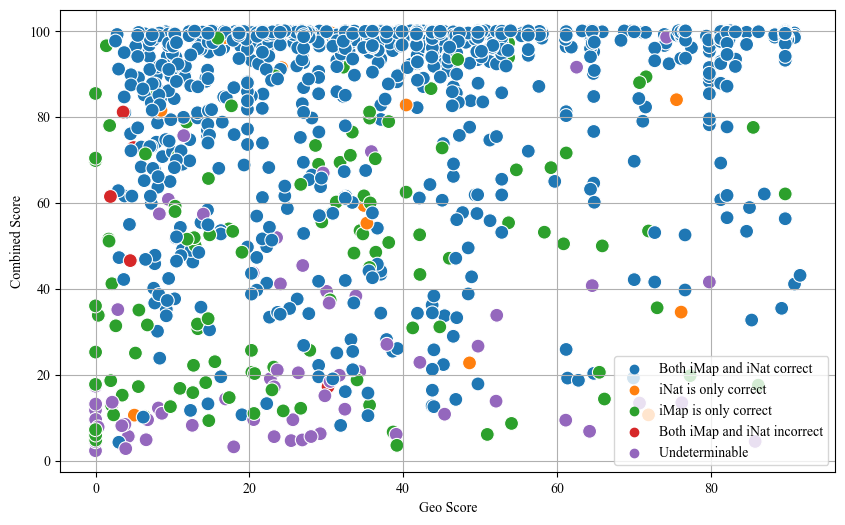

In [40]:
# Scatter plot: com_score vs. geo_score colored by species_label
plt.figure(figsize=(10, 6))
#sns.scatterplot(data, x='geo_score', y='com_score', hue='Verification', palette={'iMap is only correct': 'orange', 'iNat is only correct': 'yellow', 'Both iMap and iNat correct': 'green', 'Undeterminable': 'red', 'Both iMap and iNat incorrect': 'black'}, s=100)
sns.scatterplot(df, x='geo_score', y='com_score', hue='Verification', s=100)
#plt.title('Scatter Plot of Combined Score vs Geo Score')
plt.xlabel('Geo Score')
plt.ylabel('Combined Score')
plt.legend(
    title='',
    loc='lower right')
plt.grid(True)  # Turn on grid

#output_file = os.path.join(output_path, "Scatter plot of verification categories.png")
#plt.savefig(output_file, dpi=300, bbox_inches="tight")

plt.show()

In [42]:
# Perform statistical analysis
stats_df = df.groupby('Photo_quality')['com_score'].agg(['min', 'mean', 'median', 'max', 'std', 'count'])
stats_df

,min,mean,median,max,std,count
Photo_quality,,,,,,
Bad-Blur Photo,3.19,51.384750,51.880,99.97,34.395832,40
Bad-Dried Stems,2.29,34.765385,33.300,98.75,26.368351,52
Bad-Focused Different Species,2.78,36.786400,31.350,98.98,28.071045,25
Bad-Multiple focused species,4.39,40.897143,35.990,98.26,30.263420,35
Bad-Photo taken from long distance,4.64,41.002041,37.475,99.97,26.028243,98
Bad-limited contrast,4.45,52.557083,51.140,99.56,30.159493,48
Good photo,3.54,87.992681,96.950,100.00,18.665571,802


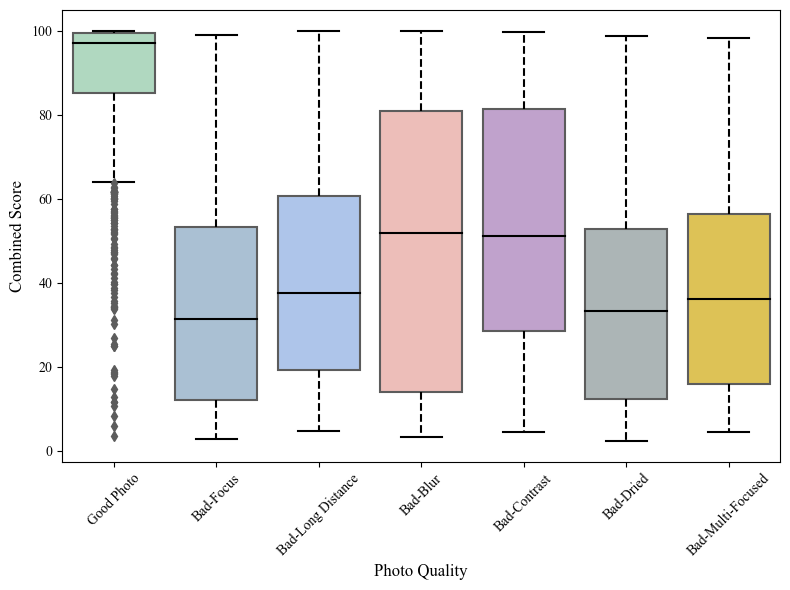

In [91]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(
    x='Photo_quality', 
    y='com_score', 
    data=df,
    palette=['#A9DFBF', '#A3C1DA', '#a4c2f4', '#F5B7B1', '#C39BD3', '#AAB7B8', '#F4D03F'],
    whiskerprops=dict(color='black', linestyle='dashed'),
    capprops=dict(color='black'),
    medianprops=dict(color='black')
)

# Shortened x-tick labels
short_labels = ['Good Photo', 'Bad-Focus', 'Bad-Long Distance', 'Bad-Blur', 'Bad-Contrast', 'Bad-Dried', 'Bad-Multi-Focused']

# Axis labels with Times New Roman
plt.xlabel('Photo Quality', fontsize=12)
plt.ylabel('Combined Score', fontsize=12)

# Apply the new labels to x-ticks
plt.xticks(
    ticks=range(len(short_labels)),
    labels=short_labels,
    rotation=45,
    fontsize=10
)

# Customize y-ticks font size
plt.yticks(fontsize=10)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save plot (optional)
output_file = os.path.join(output_path, "Boxplot of Photo quality categories.png")
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


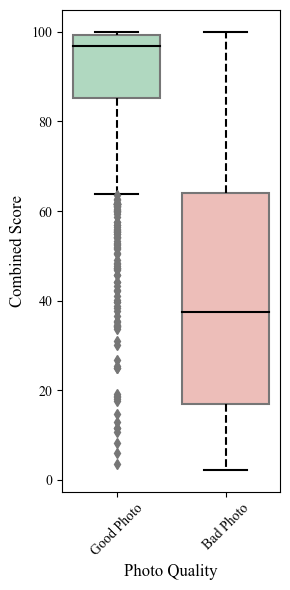

In [87]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(3, 6))

# Create the boxplot
sns.boxplot(
    x='Photo_GB', 
    y='com_score', 
    data=df,
    palette=['#A9DFBF', '#F5B7B1'],
    whiskerprops=dict(color='black', linestyle='dashed'),
    capprops=dict(color='black'),
    medianprops=dict(color='black')
)

# Shortened x-tick labels
short_labels = ['Good Photo', 'Bad Photo']

# Axis labels with Times New Roman
plt.xlabel('Photo Quality', fontsize=12)
plt.ylabel('Combined Score', fontsize=12)

# Apply the new labels to x-ticks
plt.xticks(
    ticks=range(len(short_labels)),
    labels=short_labels,
    rotation=45,
    fontsize=10
)

# Customize y-ticks font size
plt.yticks(fontsize=10)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save plot (optional)
output_file = os.path.join(output_path, "Boxplot of Good vs Bad photo.png")
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


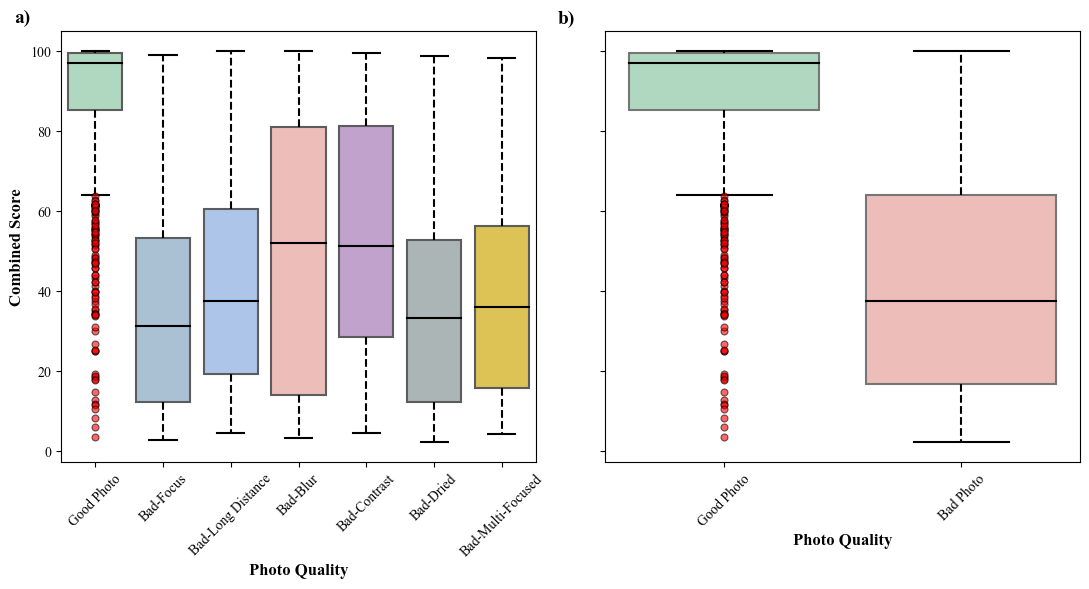

In [113]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create the figure with 2 subplots in 1 row
fig, axes = plt.subplots(1, 2, figsize=(11, 6), sharey=True)

# Define custom flier (outlier) appearance: red fill, black edge
flier_style = dict(
    marker='o',
    markersize=5,
    markerfacecolor='red',
    markeredgecolor='black',  # <-- Black border
    markeredgewidth=0.8,
    alpha=0.6,
    linestyle='none'
)

# -------- First subplot: Multi-category Photo_quality --------
sns.boxplot(
    ax=axes[0],
    x='Photo_quality', 
    y='com_score', 
    data=df,
    palette=['#A9DFBF', '#A3C1DA', '#a4c2f4', '#F5B7B1', '#C39BD3', '#AAB7B8', '#F4D03F'],
    whiskerprops=dict(color='black', linestyle='dashed'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'),
    flierprops=flier_style
)

# Custom x-tick labels for first plot
short_labels1 = ['Good Photo', 'Bad-Focus', 'Bad-Long Distance', 'Bad-Blur', 'Bad-Contrast', 'Bad-Dried', 'Bad-Multi-Focused']
axes[0].set_xticks(range(len(short_labels1)))
axes[0].set_xticklabels(short_labels1, rotation=45, fontsize=10)
axes[0].set_xlabel('Photo Quality', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Combined Score', fontsize=12, fontweight='bold')

# Label subplot "a)" in the upper-left outside corner
axes[0].text(-0.10, 1.02, 'a)', transform=axes[0].transAxes, fontsize=14, fontweight='bold')

# -------- Second subplot: Good vs Bad Photo_GB --------
sns.boxplot(
    ax=axes[1],
    x='Photo_GB', 
    y='com_score', 
    data=df,
    palette=['#A9DFBF', '#F5B7B1'],
    whiskerprops=dict(color='black', linestyle='dashed'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'),
    flierprops=flier_style
)

# Custom x-tick labels for second plot
short_labels2 = ['Good Photo', 'Bad Photo']
axes[1].set_xticks(range(len(short_labels2)))
axes[1].set_xticklabels(short_labels2, rotation=45, fontsize=10)
axes[1].set_xlabel('Photo Quality', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')  # Avoid repeating y-label

# Label subplot "b)" in the upper-left outside corner
axes[1].text(-0.10, 1.02, 'b)', transform=axes[1].transAxes, fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Save combined figure
output_file = os.path.join(output_path, "Subplot_Boxplot_PhotoQuality_Combined.png")
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show the combined plot
plt.show()


In [339]:
stats_df = df.groupby('Verification')['com_score'].agg(['min', 'mean', 'median', 'max', 'std', 'count'])
stats_df

,min,mean,median,max,std,count
Verification,,,,,,
Both iMap and iNat correct,4.26,84.619265,96.13,100.00,22.320642,884
Both iMap and iNat incorrect,17.18,55.808000,61.43,81.09,25.192181,5
Undeterminable,2.29,23.057143,13.52,98.51,22.080287,70
iMap is only correct,3.54,45.581181,48.48,98.76,27.829061,127
iNat is only correct,10.57,60.002857,70.41,99.49,35.600591,14


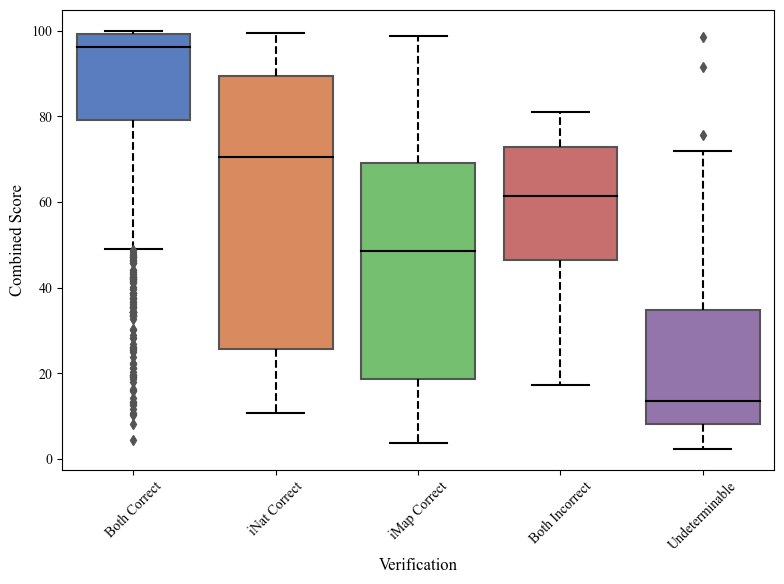

In [341]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(8, 6))

# Create the boxplot with different colors for each category
sns.boxplot(
    x='Verification', 
    y='com_score', 
    data=df,
    palette='muted',  # Use a visually distinct color palette
    whiskerprops=dict(color='black', linestyle='dashed'),  # Black whiskers
    capprops=dict(color='black'),  # Black caps
    medianprops=dict(color='black')  # Black median line
)

# Axis labels in Times New Roman with custom font size
plt.xlabel('Verification', fontsize=12)
plt.ylabel('Combined Score', fontsize=12)

# Shortened x-tick labels
short_labels = ['Both Correct', 'iNat Correct', 'iMap Correct', 'Both Incorrect', 'Undeterminable']

# Apply the new labels to x-ticks with rotation
plt.xticks(
    ticks=range(len(short_labels)),
    labels=short_labels,
    rotation=45,
    fontsize=10
)

# Customize y-ticks font size
plt.yticks(fontsize=10)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save plot (optional)
output_file = os.path.join(output_path, "Boxplot of verification categories.png")
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

### Relationship Between com_score and Correct Identification by ANOVA and Tekey's test

In [344]:
# ANOVA test to compare com_score across different Verification categories
categories = df['Verification'].unique()
category_data = [df[df['Verification'] == category]['com_score'] for category in categories]
f_stat, p_value = stats.f_oneway(*category_data)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in com_score across Verification categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in com_score across Verification categories.")


F-statistic: 178.5611708401013, p-value: 8.633646101053876e-118
Reject the null hypothesis: Significant difference in com_score across Verification categories.


In [346]:
# Tukey's HSD test for post-hoc analysis
tukey = pairwise_tukeyhsd(endog=df['com_score'], groups=df['Verification'], alpha=0.05)
print(tukey.summary())

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
           group1                       group2            meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------------
  Both iMap and iNat correct Both iMap and iNat incorrect -28.8113 0.0454 -57.2591  -0.3634   True
  Both iMap and iNat correct              Undeterminable  -61.5621    0.0 -69.4382 -53.6861   True
  Both iMap and iNat correct         iMap is only correct -39.0381    0.0 -45.0575 -33.0186   True
  Both iMap and iNat correct         iNat is only correct -24.6164 0.0008 -41.7031  -7.5297   True
Both iMap and iNat incorrect              Undeterminable  -32.7509   0.02 -62.1142  -3.3875   True
Both iMap and iNat incorrect         iMap is only correct -10.2268 0.8703 -39.1476  18.6939  False
Both iMap and iNat incorrect         iNat is only correct   4.1949 0.9969 -28.8525  37.2422  False
          

### Logistic Regression

### Assumptions of Logistic Regression

The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

In [350]:
# Declare feature vector and target variable
X = df[['com_score', 'geo_score', 'Photo_quality_binary']]

y = df['species_label']

In [352]:
# Split data into separate training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [354]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((880, 3), (220, 3))

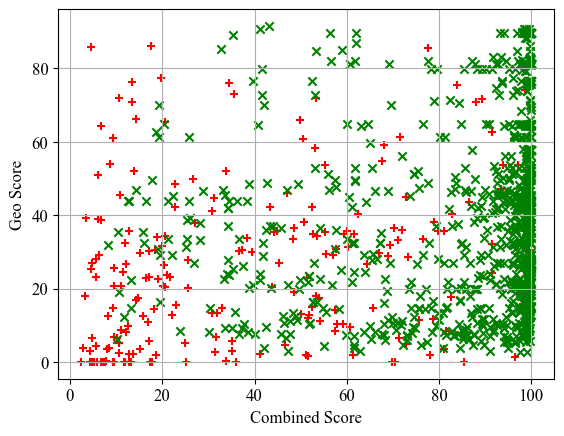

In [356]:
# Plot data points
def plot_points(xy, labels):
    markers = ['+', 'x', '.']
    colors = ['red', 'green', 'blue']
    
    # Convert labels to numpy array to avoid KeyError
    labels = labels.to_numpy() if hasattr(labels, "to_numpy") else labels

    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

# Convert X_train to NumPy array before plotting
plot_points(X.values, y)
plt.xlabel('Combined Score')
plt.ylabel('Geo Score')
#plt.title('Feature Distribution')
plt.grid(True)

#output_file = os.path.join(output_path, "Scatter plot of correct vs incorrect identification.png")
# plt.savefig(output_file, dpi=300, bbox_inches="tight")

plt.show()

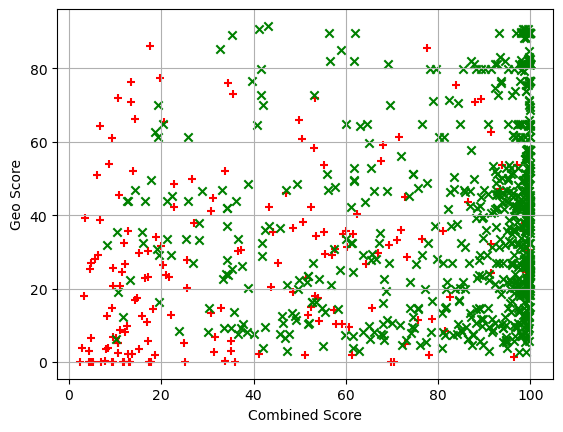

In [68]:
# Plot data points
def plot_points(xy, labels):
    markers = ['+', 'x', '.']
    colors = ['red', 'green', 'blue']
    
    # Convert labels to numpy array to avoid KeyError
    labels = labels.to_numpy() if hasattr(labels, "to_numpy") else labels

    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

# Convert X_train to NumPy array before plotting
plot_points(X_train.values, y_train)
plt.xlabel('Combined Score')
plt.ylabel('Geo Score')
#plt.title('Feature Distribution')
plt.grid(True)
plt.show()

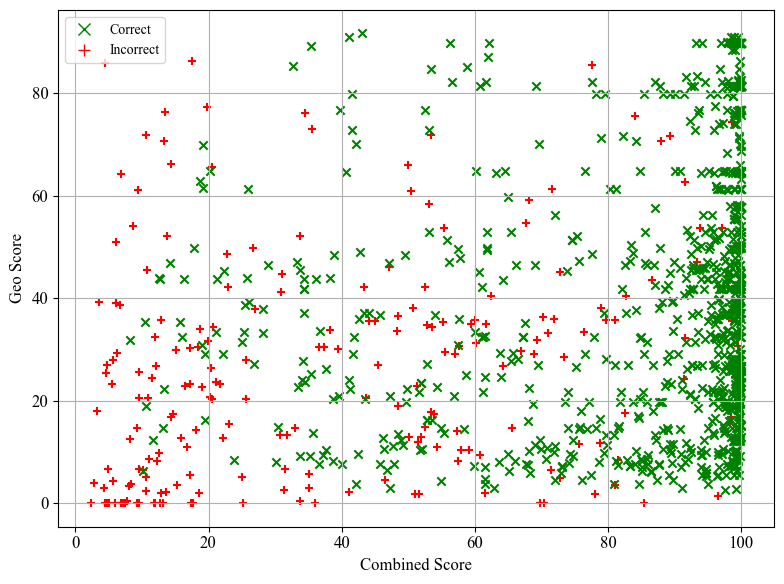

In [364]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Plot data points function
def plot_points(xy, labels):
    # Define markers and colors
    markers = ['+', 'x', '.']
    colors = ['red', 'green', 'blue']

    # Convert labels to numpy array if it's not already
    labels = labels.to_numpy() if hasattr(labels, "to_numpy") else labels

    # Create scatter plots for each label
    for i, label in enumerate(set(labels)):
        # Extract points for this label
        points = np.array([xy[j, :] for j in range(len(xy)) if labels[j] == label])
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]

        # Plot points
        plt.scatter(points[:, 0], points[:, 1], marker=marker, color=color, label=f'Class {label}')

# Plot the data
plt.figure(figsize=(8, 6))

# Convert X_train to NumPy array before plotting
plot_points(X.values, y)

# Labels and title
plt.xlabel('Combined Score', fontsize=12)
plt.ylabel('Geo Score', fontsize=12)
# plt.title('Feature Distribution', fontsize=14)

# Add custom legend mapping
custom_handles = [
    plt.Line2D([0], [0], marker='x', color='green', linestyle='None', markersize=8, label='Correct'),
    plt.Line2D([0], [0], marker='+', color='red', linestyle='None', markersize=8, label='Incorrect')
]

plt.legend(handles=custom_handles, loc='upper left', fontsize=10)

# Grid and layout
plt.grid(True)
plt.tight_layout()

#output_file = os.path.join(output_path, "Scatter plot of correct vs incorrect identification.png")
#plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


### Model training

In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for C values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression
logreg = LogisticRegression(solver='liblinear')

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best C value
print(f"Best C value: {grid_search.best_params_['C']}")
print(f"Best accuracy: {grid_search.best_score_:.4f}")

Best C value: 0.1
Best accuracy: 0.8648


In [367]:
# Model training
# train a logistic regression model on the training set
#from sklearn.linear_model import LogisticRegression


# instantiate the model
#logreg = LogisticRegression(C=0.1, solver='liblinear', random_state=0)


# fit the model
#logreg.fit(X_train, y_train)

In [368]:
# Train a logistic regression model
log_reg = LogisticRegression(C=100, solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)

# Predict probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

### Predict results

In [370]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [371]:
# probability of getting output as 0 - Incorrect identification

log_reg.predict_proba(X_test)[:,0][0:10, ] # Showing the first 10 values

array([0.08664285, 0.04306616, 0.05013827, 0.51815969, 0.04742521,
       0.03106638, 0.0366222 , 0.04507282, 0.14098039, 0.03148298])

In [372]:
# probability of getting output as 1 - Correct identification

log_reg.predict_proba(X_test)[:,1][0:10, ] # Showing the first 10 values

array([0.91335715, 0.95693384, 0.94986173, 0.48184031, 0.95257479,
       0.96893362, 0.9633778 , 0.95492718, 0.85901961, 0.96851702])

### Check accuracy score 

In [374]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8682


### Compare the train-set and test-set accuracy

In [376]:
y_pred_train = log_reg.predict(X_train)

y_pred_train

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [377]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8557


In [378]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

Training set score: 0.8557
Test set score: 0.8682


In [379]:
# check class distribution in test set
y_test.value_counts()


1    182
0     38
Name: species_label, dtype: int64

### Confusion Matrix

In [392]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives (FN) = ', cm[1,0])

print('\nTrue Positives (TP) = ', cm[1,1])

Confusion matrix

 [[ 16  22]
 [  7 175]]

True Negatives(TN) =  16

False Positives(FP) =  22

False Negatives (FN) =  7

True Positives (TP) =  175


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

1. True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

2. True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

3. False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

4. False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

1. True Positives (Actual Positive:1 and Predict Positive:1) - 175
2. True Negatives (Actual Negative:0 and Predict Negative:0) - 16
3. False Positives (Actual Negative:0 but Predict Positive:1) - 22 (Type I error)
4. False Negatives (Actual Positive:1 but Predict Negative:0) - 7 (Type II error)

In [396]:
df.head()

,S.L.,imaplink,presenceId,presentSpeciesId,iMapPhoto,imap_sci,imap_com,imap_record_taxon,inatlink,inat_sci,inat_com,inat_taxon,geo_score,com_score,visual_model,species_label,com_status,Verification,Photo_quality,Photo_quality_binary
0,1,View,1410322,1422773,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,9.33,93.99,NaN,1,NaN,Both iMap and iNat correct,Good photo,6
1,2,View,1409419,1421839,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,9.33,94.06,NaN,1,NaN,Both iMap and iNat correct,Good photo,6
2,3,View,1062878,1067548,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,7.90,74.07,NaN,1,NaN,Both iMap and iNat correct,Good photo,6
3,4,View,1054189,1058523,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,7.90,89.51,NaN,1,NaN,Both iMap and iNat correct,Good photo,6
4,5,View,1150463,1157323,View,Litylenchus crenatae mccannii,Beech leaf disease nematode,1103716,View,Litylenchus crenatae,Beech leaf disease,1103716,45.38,99.80,NaN,1,NaN,Both iMap and iNat correct,Good photo,6


<AxesSubplot: >

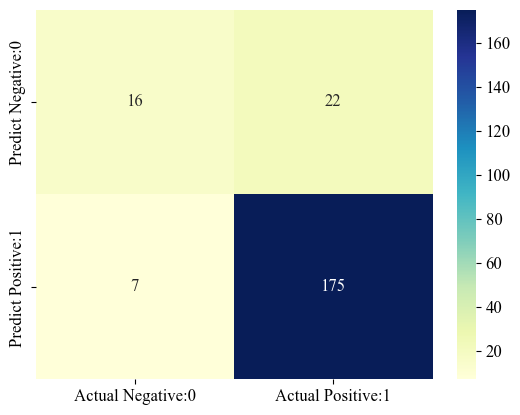

In [398]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'], 
                                 index=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Metrics

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [402]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test, zero_division=1))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52        38
           1       0.89      0.96      0.92       182

    accuracy                           0.87       220
   macro avg       0.79      0.69      0.72       220
weighted avg       0.86      0.87      0.85       220



### Classification accuracy

In [405]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [407]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8682


### Classification error

In [410]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1318


### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

In [413]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8883


### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

In [416]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9615


### Specificity

In [419]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4211


### Adjusting the threshold level

In [422]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = log_reg.predict_proba(X_test)[0:10, ]
y_pred_prob

array([[0.08664285, 0.91335715],
       [0.04306616, 0.95693384],
       [0.05013827, 0.94986173],
       [0.51815969, 0.48184031],
       [0.04742521, 0.95257479],
       [0.03106638, 0.96893362],
       [0.0366222 , 0.9633778 ],
       [0.04507282, 0.95492718],
       [0.14098039, 0.85901961],
       [0.03148298, 0.96851702]])

In [424]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Incorrect (0)', 'Prob of - Correct (1)'])

y_pred_prob_df.head()

,Prob of - Incorrect (0),Prob of - Correct (1)
0,0.086643,0.913357
1,0.043066,0.956934
2,0.050138,0.949862
3,0.518160,0.481840
4,0.047425,0.952575


In [426]:
# print the first 10 predicted probabilities for class 1 - Correct

log_reg.predict_proba(X_test)[0:10, 1]

array([0.91335715, 0.95693384, 0.94986173, 0.48184031, 0.95257479,
       0.96893362, 0.9633778 , 0.95492718, 0.85901961, 0.96851702])

In [428]:
# store the predicted probabilities for class 1 - Probability of correct

y_pred1 = log_reg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

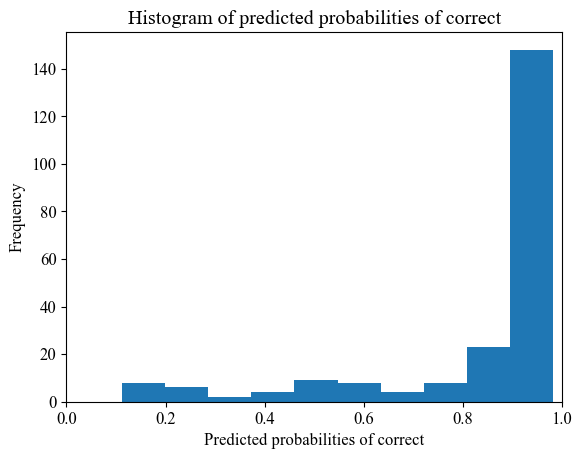

In [430]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of correct')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of correct')
plt.ylabel('Frequency')

### ROC - AUC
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

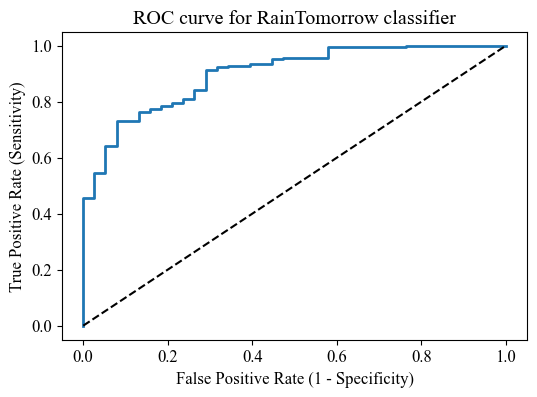

In [433]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [435]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8992


ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [438]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8886


### Threshold

In [441]:
# Find the optimal threshold using Logistic regression and Younden's J Statistics
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print(f"Optimal Threshold for com_score based on Logistic Regression: {optimal_threshold:.2f}")

Optimal Threshold for com_score based on Logistic Regression: 0.92


In [443]:
# Find the corresponding com_score threshold value
threshold_value = X_test[y_pred_proba >= optimal_threshold].min() # Using mean or min function to extract the corresponing threshold value
print(f"Corresponding com_score value for the optimal threshold: {threshold_value.iloc[0]:.2f}")

Corresponding com_score value for the optimal threshold: 77.62


### Explanation of using this methodology

### 1. Why Use ANOVA?
Context & Justification
The dataset includes multiple categorical verification categories (e.g., iMap correct, iNat correct, Both correct, Neither correct).
We want to determine if there is a significant difference in com_score across these categories.
The com_score values are continuous numerical data, making it appropriate for ANOVA.

#### Null & Alternative Hypotheses
Null Hypothesis (H₀): There is no significant difference in com_score across verification categories.
Alternative Hypothesis (H₁): At least one verification category has a significantly different com_score.

#### Critical Interpretation
If the p-value < 0.05, we reject the null hypothesis, meaning com_score significantly differs across at least one category.
However, ANOVA does not tell us which categories are different, only that at least one difference exists.


### 2. Why Use Tukey’s HSD (Pairwise Comparison)?
#### Context & Justification
If ANOVA finds a significant difference, we must determine which groups differ.
Tukey’s Honest Significant Difference (HSD) test performs pairwise comparisons between all groups while controlling for the family-wise error rate.

#### Critical Interpretation
Tukey’s test provides adjusted p-values and confidence intervals for each pairwise comparison.
If a confidence interval does not include zero, the difference between the two groups is statistically significant.

### 3. Why Use Logistic Regression?
#### Context & Justification
The goal is to classify observations into two classes:
Correct Identification (1) = Both iMap and iNat correct.
Incorrect Identification (0) = Any other category.
    
Logistic regression is appropriate for binary classification problems because:
It models the probability that an observation belongs to class 1 (correct identification).
It provides probability scores, which can be thresholded to optimize classification performance.

### 4. Why Use Youden’s J Statistic for Optimal Threshold Selection?
#### Context & Justification
Logistic regression provides probability scores, but we need to determine a decision threshold to classify observations.
The default threshold is 0.5, but this is not necessarily optimal in real-world classification tasks.
Youden’s J Statistic identifies the threshold that maximizes the trade-off between sensitivity and specificity.
Mathematical Justification

J=Sensitivity−(1 - Specificity)

where:

Sensitivity (True Positive Rate, TPR) = proportion of correctly classified positives.

Specificity (True Negative Rate, 1 - False Positive Rate, FPR) = proportion of correctly classified negatives.

#### Critical Interpretation
The optimal threshold is selected from the ROC curve where J is maximized.
The corresponding minimum com_score value at this threshold is also identified.

### Threshold for all 11 species

Beach leaf disease nematode (Litylenchus crenatae mccannii): 85.69 

Common buckthorn (Rhamnus cathartica): 81.5

Garlic mustard (Alliaria petiolata): 88.91

Hemlock Woolly Adelgid (Adelges tsugae): 82.85

Japanese Knotweed (Reynoutria japonica): 76.73

Japanese Barberry (Berberis thunbergii): 90.06

Multiflora Rose (Rosa multiflora): 74.05

Oriental Bittersweet (Celastrus orbiculatus): 65.45

Purple Loosestrife (Lythrum salicaria): 89.08

Spotted Lanternfly (Lycorma delicatula): 92.79

Tree-of-heaven (Ailanthus altissima): 87.09

Combined threshold value for 11 species: 77.62

### Mean Geo_score for all 11 species

Beach leaf disease nematode (Litylenchus crenatae mccannii): 21.54 

Common buckthorn (Rhamnus cathartica): 31.47

Garlic mustard (Alliaria petiolata): 39.89

Hemlock Woolly Adelgid (Adelges tsugae): 21.26

Japanese Knotweed (Reynoutria japonica): 31.94

Japanese Barberry (Berberis thunbergii): 36.55

Multiflora Rose (Rosa multiflora): 41.31

Oriental Bittersweet (Celastrus orbiculatus): 33.65

Purple Loosestrife (Lythrum salicaria): 38.21

Spotted Lanternfly (Lycorma delicatula): 72.02

Tree-of-heaven (Ailanthus altissima): 32.68

Combined threshold value for 11 species: 36.5

### Evaluation of classification metrics

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = r"C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Outputs\Threshold and statistical analysis values\Threshold and accuracy values.csv"
df = pd.read_csv(file_path)

# Set species name as the index for better visualization
df = df.set_index("Name of species")

# Convert Best Accuracy to Percentage
df["Best accuracy"] = df["Best accuracy"] * 100  # Convert to percentage

# Define key columns for visualization
selected_columns = ["Threshold", "Mean com score", "Mean at label 1", "Mean at label 0", "Standard deviation", "Mean geo score", "Best accuracy"]


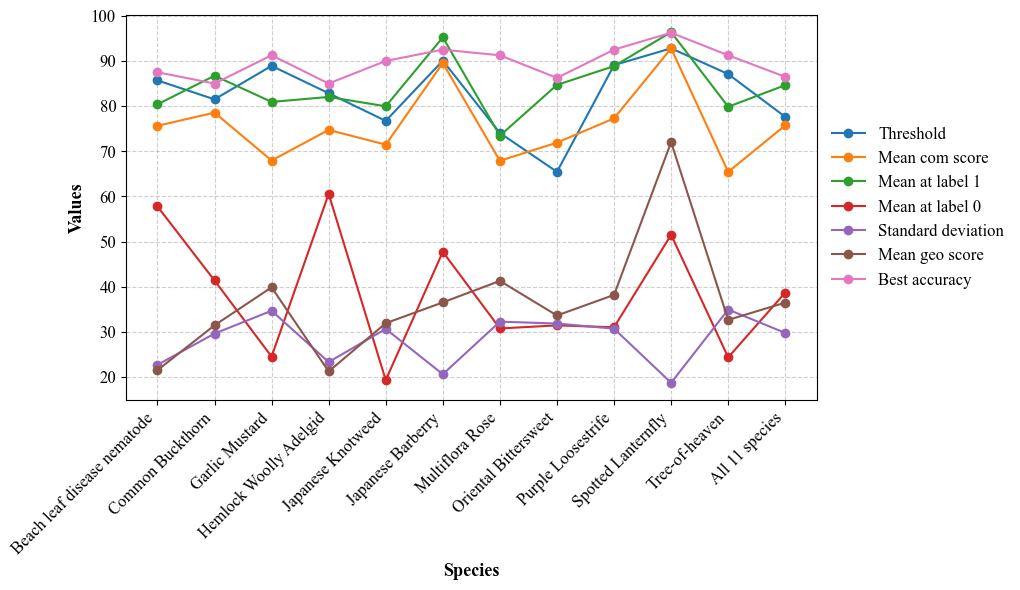

In [15]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Set output path
output_path = r"C:\Users\tmollick\Documents\iMapInvasives_NYNHP\Figures"

# 1. Line Plot: Trends of Key Metrics Across Species
plt.figure(figsize=(12, 6))

for col in selected_columns:
    plt.plot(df.index, df[col], marker='o', label=col)

# Titles and labels
plt.xlabel("Species", fontsize=13, fontweight='bold')
plt.ylabel("Values", fontsize=13, fontweight='bold')

# Rotate x-tick labels
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Add legend outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)

# Add grid
plt.grid(True, linestyle="--", alpha=0.6)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on right for legend

# Save figure
output_file = os.path.join(output_path, "Line plot for trend of key metrics across species.png")
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

#### Critical Analysis of Classification Metrics and Invasive Species Spread
This graph provides a comparative analysis of key classification metrics—Threshold values, Mean Com Score, Mean Geo Score, Best Accuracy, and Standard Deviation—across various invasive species. The Threshold values (blue) indicate the minimum confidence required for species identification, with species like Japanese Barberry, Spotted Lanternfly, and Purple Loosestrife requiring higher classification confidence (~90%), suggesting their distinct visual characteristics make them easier to identify. In contrast, species such as Oriental Bittersweet and Multiflora Rose have lower thresholds (~65-75%), implying greater classification difficulty, likely due to morphological similarities with native species or variability in image quality.

The Mean Com Score (orange) trends similarly to threshold values, reinforcing that species with higher classification confidence also require stricter threshold values. However, species like Hemlock Woolly Adelgid and Tree-of-heaven have lower confidence scores, indicating challenges in classification due to overlapping visual traits with other species, variations in image conditions, or inconsistent model training data.

The Mean Geo Score (green) provides critical insights into the spatial distribution of invasive species. Higher geo scores indicate species that are commonly found near other similar species, suggesting established populations in specific areas where they are already dominant. For example, species with high geo scores may be part of densely invaded ecosystems, where their spread is well documented. In contrast, species with low geo scores are likely invading new areas, where they are not yet well established. This suggests that species with low geo scores may be at the early stages of an invasion process, making them critical targets for monitoring and early intervention.

For example, the sharp peak in geo score for Spotted Lanternfly suggests that this species is highly clustered in areas where it is already well established, likely due to its rapid colonization and preference for specific host plants. On the other hand, species with low geo scores, such as Tree-of-heaven and Hemlock Woolly Adelgid, may be spreading into new areas where they were previously absent, indicating the active expansion of invasive species into novel environments.


Best Accuracy (red) remains consistently high (~85-95%) across species, reflecting the robust performance of the classification model. However, species such as Hemlock Woolly Adelgid and Common Buckthorn show slightly lower accuracy (~85%), suggesting higher misclassification rates, possibly due to visual similarities with native species or data imbalances in the training set.

The Standard Deviation (purple) remains relatively low for most species, suggesting stable classification performance. However, species like Tree-of-heaven and Spotted Lanternfly exhibit higher variability, indicating inconsistent classification, possibly due to differences in seasonal appearance, image quality, or similarity to co-occurring species.

#### Implications for Invasive Species Monitoring and Control
This analysis highlights how classification metrics, particularly Mean Geo Score, can provide early warning indicators for new invasive species spread. High geo scores suggest species clustering within well-established invaded areas, whereas low geo scores indicate potential range expansion into new environments. This insight is critical for early detection and rapid response strategies, allowing for targeted management efforts to prevent further spread.

To enhance classification accuracy and improve invasive species monitoring, future research should focus on dynamic threshold adjustments based on classification confidence, incorporating additional environmental variables such as climate and habitat data, and refining geospatial analysis to better track invasion dynamics. By integrating machine learning with spatial modeling, we can enhance our ability to detect and predict invasive species spread, ultimately informing more effective conservation and management strategies.

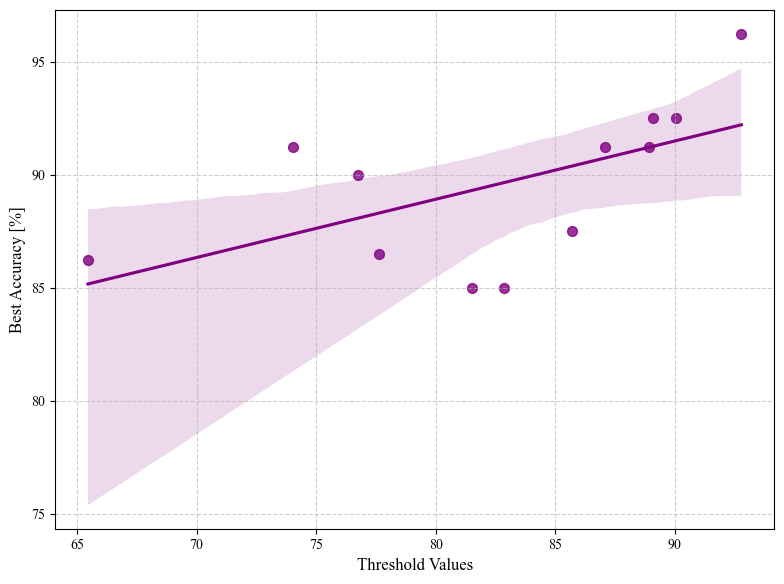

In [457]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 2. Scatter Plot with Regression Line (for Accuracy vs Threshold)
plt.figure(figsize=(8, 6))

sns.regplot(
    x=df["Threshold"],
    y=df["Best accuracy"],
    scatter_kws={"s": 50},
    color="purple"
)

# Labels with Times New Roman and consistent font size
plt.xlabel("Threshold Values", fontsize=12)
plt.ylabel("Best Accuracy [%]", fontsize=12)

# Customize tick label font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional title
# plt.title("Threshold Values vs Best Accuracy (%)", fontsize=14)

# Grid and layout adjustments
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Save figure (optional)
output_file = os.path.join(output_path, "scatter threshold vs accuracy.png")
plt.savefig(output_file, dpi=300, bbox_inches="tight")

plt.show()

#### Critical Analysis of Threshold Values and Accuracy
This scatter plot examines the relationship between Threshold Values and Best Accuracy (%) in species classification. The positive correlation suggests that higher threshold values lead to better classification accuracy, as stricter confidence levels reduce misclassifications. Species with high thresholds (~85-90%) consistently achieve over 90% accuracy, likely due to distinct morphological traits that make them easier to classify.

However, species with lower thresholds (~65-75%) show greater variability in accuracy, indicating classification challenges due to visual similarities, inconsistent training data, or environmental factors. The wider confidence interval at lower thresholds suggests increased uncertainty, highlighting the need for improved feature extraction, dataset expansion, and refined threshold adjustments for these species.

This analysis underscores a key trade-off—while higher thresholds improve precision, they may reduce recall, potentially missing some invasive species. A dynamic thresholding approach that adjusts confidence levels based on classification patterns could optimize detection while minimizing errors, enhancing species monitoring and management strategies.